## Importing requirements

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

## Data loading

We execute a bash file to load the data from kaggle, organize our images in different folders (test, train, validation) and give the necessary rights to read files. To execute only once.

In [1]:
!./downloader.sh

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
mkdir: data: File exists


## Data overview

Overview on the CSV structure:

In [34]:
df = pd.read_csv('data/HAM10000_metadata.csv', sep = ',')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


#### CATEGORY DISTRIBUTION
*dx* corresponds to the type of skin cancer. We can see the the *nv* cancer is much more represented than other types of skin cancers.

In [119]:
sns.set(style="whitegrid", font_scale=1.5)

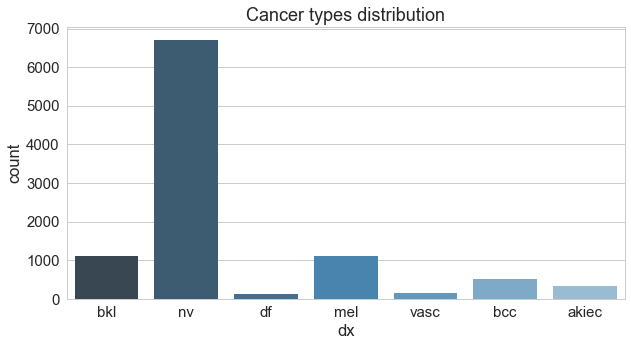

In [124]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='dx', data = df, palette = 'Blues_d').set_title("Cancer types distribution")
plt.show()

#### DISTRIBUTION OF OTHER FEATURES

##### AGE

/Users/robinali/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/robinali/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


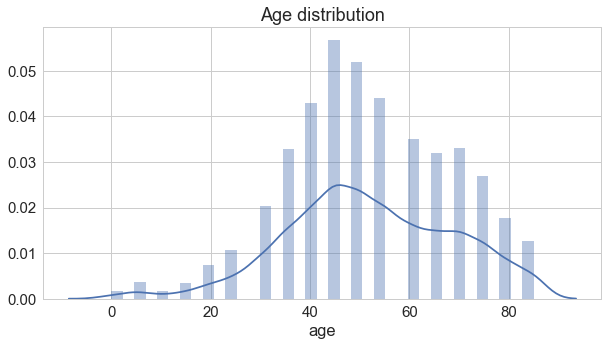

In [107]:
pyplot.subplots(figsize=(10, 5))
sns.distplot(df['age'].dropna()).set_title("Age distribution")
plt.show()

##### GENDER

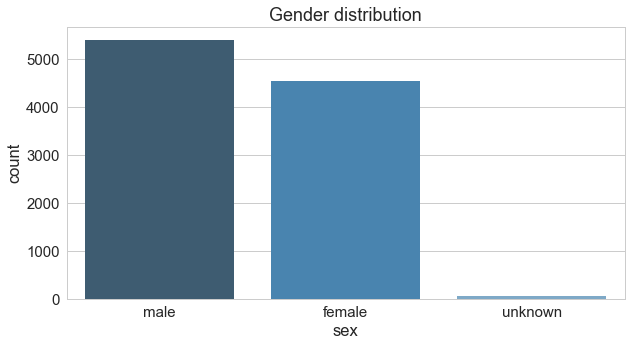

In [125]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='sex', data = df, palette = 'Blues_d').set_title("Gender distribution")
plt.show()

##### LOCALIZATION

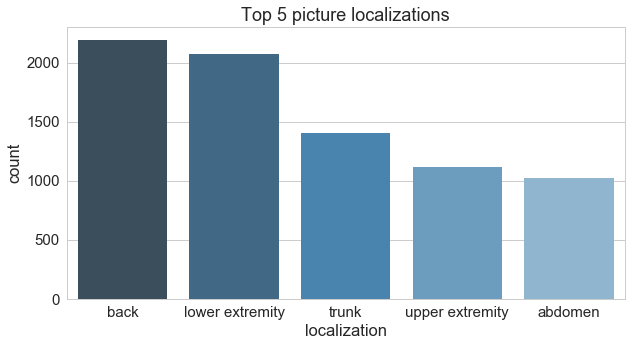

In [126]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='localization', data = df, palette = 'Blues_d', order = df['localization'].value_counts().iloc[:5].index).set_title("Top 5 picture localizations")
plt.show()

## Pre-processing

In [ ]:
Resizing

In [ ]:
Data Augmentation